## https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
plt.rcParams["figure.figsize"] = [16,9]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_excel("D:\Άκης\Data_Science\Deree\ITC6002A1 - EXPLORING AND ANALYZING DATA\Final_Project\data\Gold-Historical-Prices-1-2.xlsx"
                  ,sheet_name="Gold Historical Data")

In [4]:
df = df[['Price', "Date"]]
df = df[df.Price.notna()]
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)
df_1980 = df[df.index.year == 1980].copy()
df_1981 = df[df.index.year == 1981].copy()

In [5]:
total_working_days = 0
for i in range(0,12):
    print("Month:", i+1,df_1980[df_1980.index.month == i+1].shape[0], "working days.")
    total_working_days =  total_working_days + df_1980[df_1980.index.month == i+1].shape[0]
print("Number of working days", total_working_days)

Month: 1 23 working days.
Month: 2 21 working days.
Month: 3 21 working days.
Month: 4 22 working days.
Month: 5 22 working days.
Month: 6 21 working days.
Month: 7 23 working days.
Month: 8 21 working days.
Month: 9 22 working days.
Month: 10 23 working days.
Month: 11 20 working days.
Month: 12 23 working days.
Number of working days 262


## Predict stocks for 1980 based on January and February

In [39]:
#Working days except first month 
days_to_create_index = total_working_days - df_1980[df_1980.index.month == 1].shape[0]
#Separate January of the Year
df_jan = df_1980[df_1980.index.month == 1]
df_feb = df_1980[df_1980.index.month == 2]
df_other_months = df_1980[(df_1980.index.month != 1) &(df_1980.index.month != 2)]

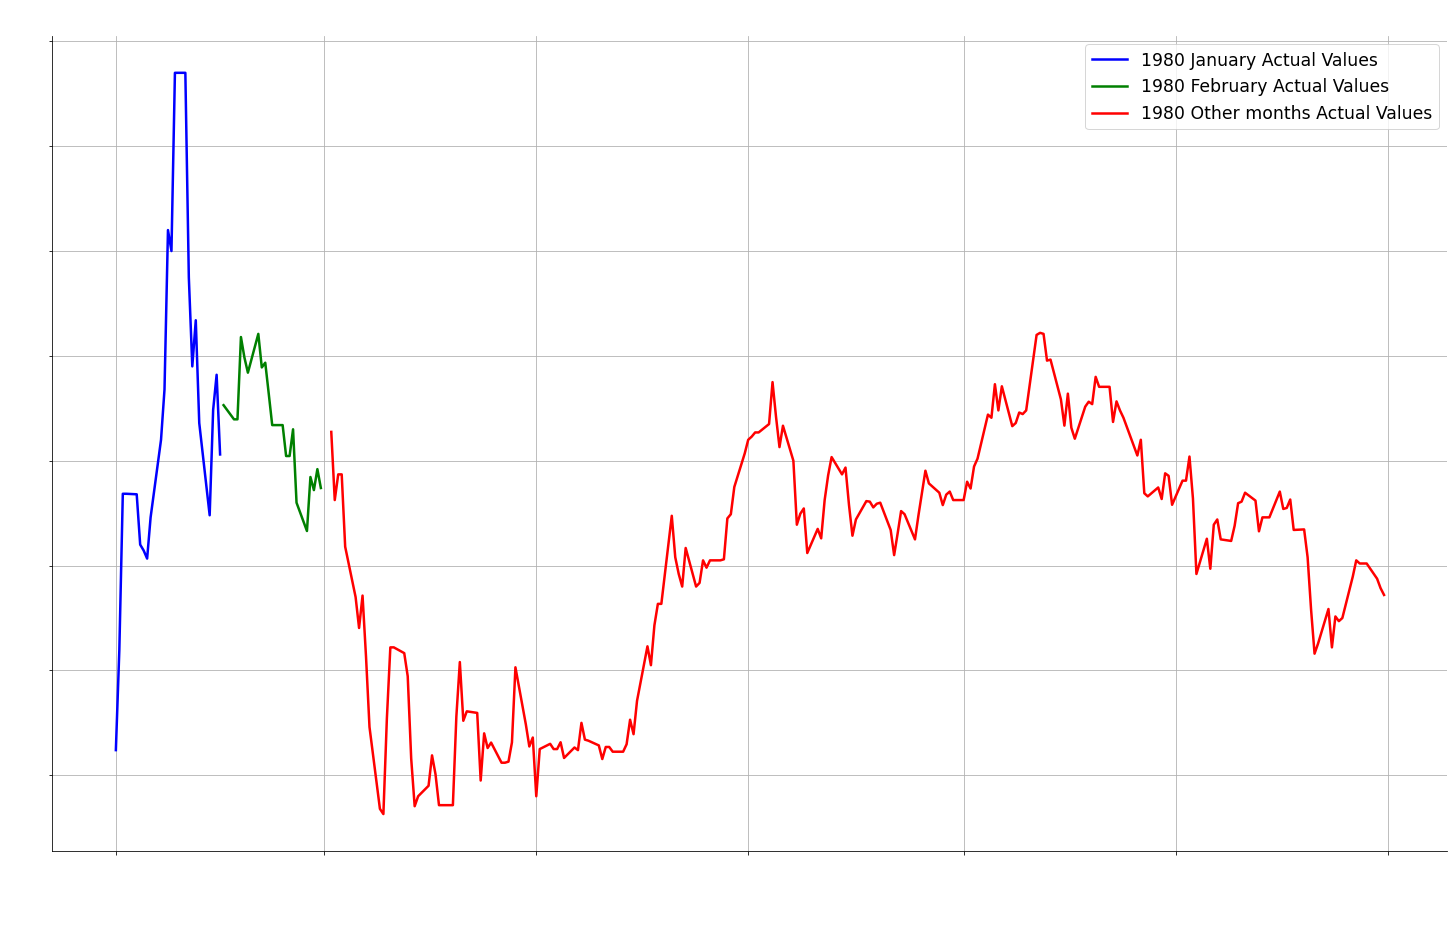

In [48]:
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_jan["Price"], color = "blue",label='1980 January Actual Values')
plt.plot(df_feb["Price"], color = "green",label='1980 February Actual Values')
plt.plot(df_other_months["Price"], color = "red",label='1980 Other months Actual Values')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [42]:
X = df_jan[['Price']][2:]  # features
y = df_feb[['Price']]  # target

In [79]:
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [64]:
# Store the fitted values as a time series with the same time index as
# the training data
y_pred = model.predict(df_other_months[["Price"]])#, index=df_other_months.index)

In [71]:
df_preds = pd.DataFrame(y_pred,
                        columns=["Price"],
                        index=df_other_months.index)

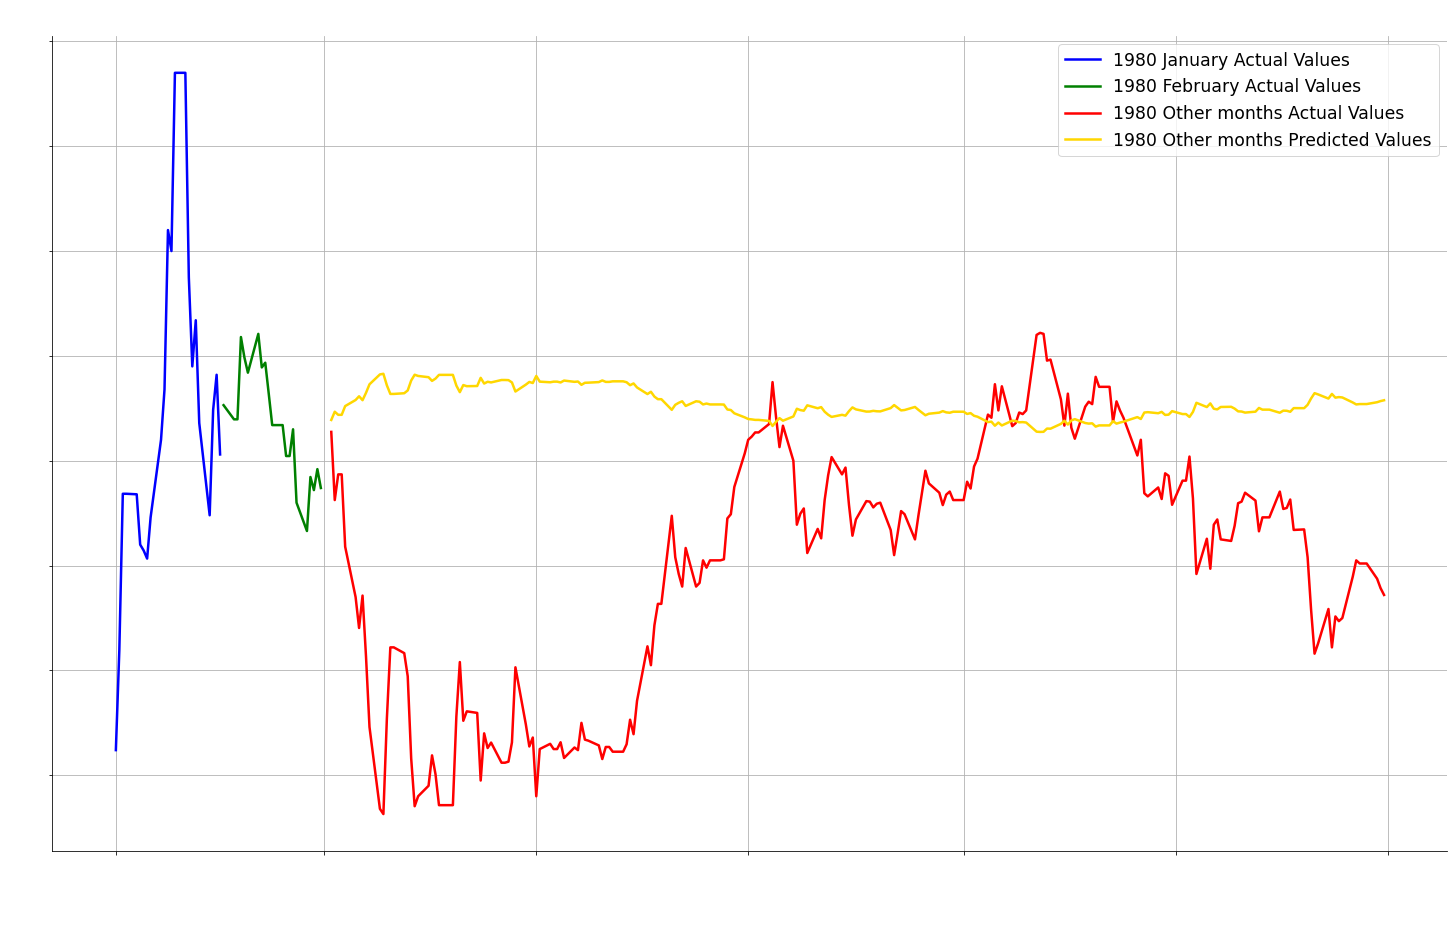

In [102]:
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_jan["Price"], color = "blue",label='1980 January Actual Values')
plt.plot(df_feb["Price"], color = "green",label='1980 February Actual Values')
plt.plot(df_other_months["Price"], color = "red",label='1980 Other months Actual Values')
plt.plot(df_preds["Price"], color = "gold",label='1980 Other months Predicted Values')


plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [106]:
intercept = model.intercept_[0] #intersept - b
coef = model.coef_[0][0] #slope - a
print(f"y={coef}*x+{intercept}")

y=-0.1207971676799849*x+749.6309168295546


In [109]:
mse = mean_absolute_error(df_other_months["Price"],df_preds["Price"])
rmse = np.sqrt(mse)
print(mse)
print(rmse)

79.30147234211152
8.905137412870817


## Predict stocks for 1980 based on January and February

In [126]:
#Working days except first month 
days_to_create_index = total_working_days - df_1981[df_1981.index.month == 1].shape[0]
#Separate January of the Year
df_jan = df_1981[df_1981.index.month == 1]
df_feb = df_1981[df_1981.index.month == 2]
df_other_months = df_1981[(df_1981.index.month != 1) &(df_1981.index.month != 2)]

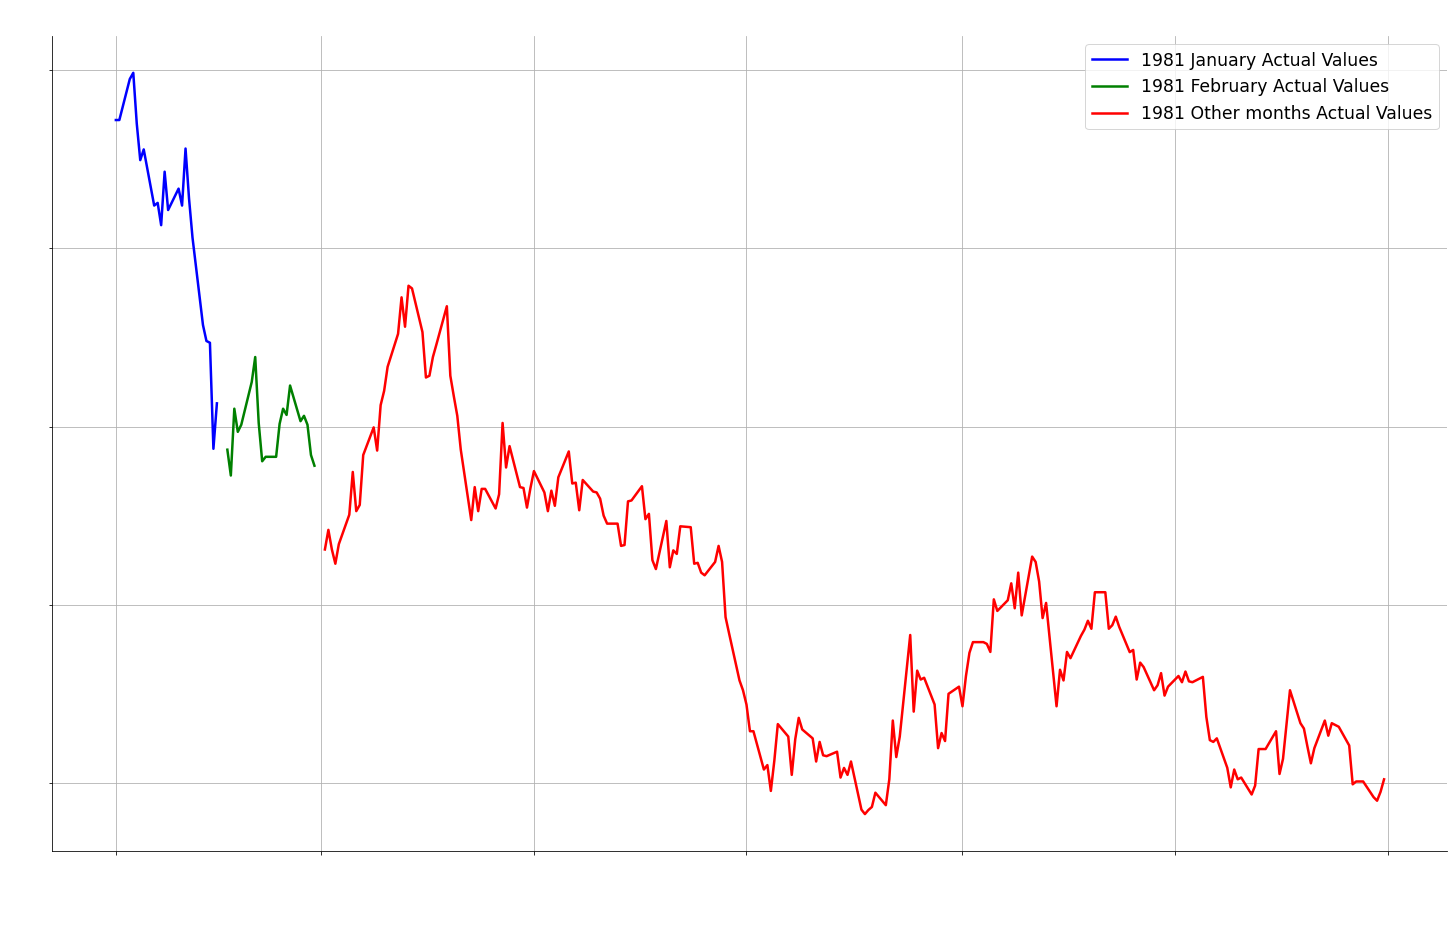

In [127]:
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_jan["Price"], color = "blue",label='1981 January Actual Values')
plt.plot(df_feb["Price"], color = "green",label='1981 February Actual Values')
plt.plot(df_other_months["Price"], color = "red",label='1981 Other months Actual Values')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [128]:
X = df_jan[['Price']][2:]  # features
y = df_feb[['Price']]  # target

In [138]:
# Train the model
model = LinearRegression()
lr = model.fit(X, y)
intercept = model.intercept_[0] #intersept - b
coef = lr.coef_[0][0] #slope - a
print(f"y={coef}*x+{intercept}")

y=0.012142503845274684*x+493.056920137942


In [139]:
# Store the fitted values as a time series with the same time index as
# the training data
y_pred = lr.predict(df_other_months[["Price"]])#, index=df_other_months.index)

In [140]:
df_preds = pd.DataFrame(y_pred,
                        columns=["Price"],
                        index=df_other_months.index)

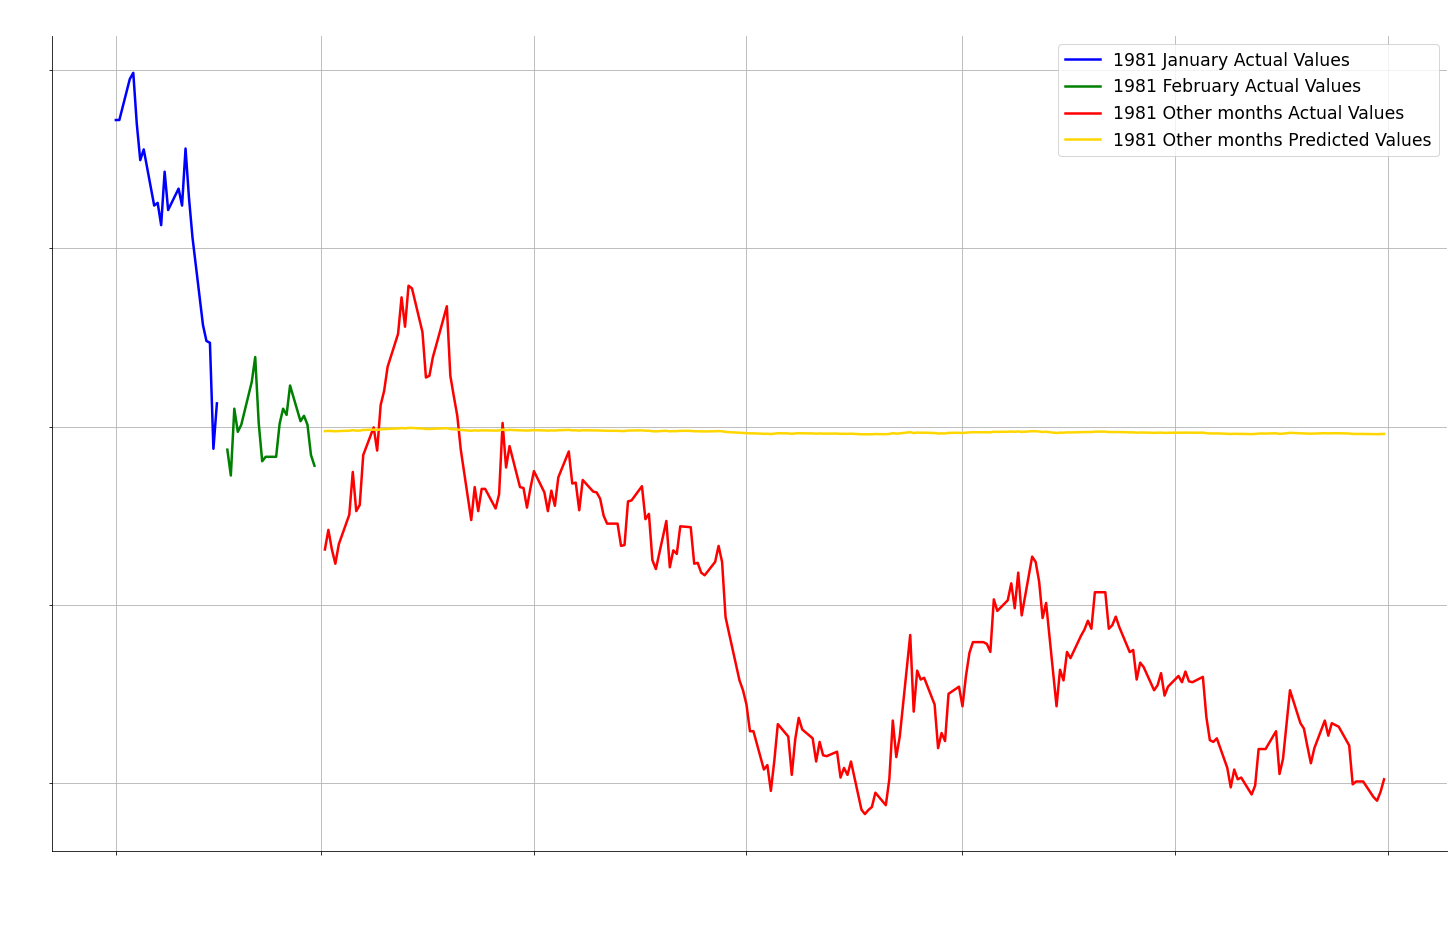

In [141]:
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_jan["Price"], color = "blue",label='1981 January Actual Values')
plt.plot(df_feb["Price"], color = "green",label='1981 February Actual Values')
plt.plot(df_other_months["Price"], color = "red",label='1981 Other months Actual Values')
plt.plot(df_preds["Price"], color = "gold",label='1981 Other months Predicted Values')


plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [146]:
mse = mean_absolute_error(df_other_months["Price"],df_preds["Price"])
rmse = np.sqrt(mse)
print(mse)
print(rmse)

56.22785402702403
7.498523456456213
